<a href="https://colab.research.google.com/github/Kishan1082/Deep-Learning/blob/main/Day7_Autoencoders_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input,Dense
from keras.datasets import mnist

In [ ]:
(X_train, _) , (X_test,_) = mnist.load_data()
print(X_train.shape, X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# X_train /= 255
# X_test /= 255

In [ ]:
X_train = X_train.reshape((X_train.shape[0], np.prod(X_train.shape[1:])))
X_train.shape

(60000, 784)

In [ ]:
X_test = X_test.reshape((X_test.shape[0], np.prod(X_test.shape[1:])))
X_test.shape

(10000, 784)

In [ ]:
input = Input(shape = (784,))
encoded = Dense(32, activation="relu")(input)
decoded = Dense(784, activation="sigmoid")(encoded)
model = Model(inputs=input, outputs = decoded)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_and_compare(X_test, decoded_images):
  n = 10
  plt.figure(figsize=(20,4))
  for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

Optimizer: adam
Epoch 1/5
352/352 [==============================] - 5s 6ms/step - loss: 0.2498 - accuracy: 0.0129 - val_loss: 0.1743 - val_accuracy: 0.0099
Epoch 2/5
352/352 [==============================] - 2s 6ms/step - loss: 0.1557 - accuracy: 0.0091 - val_loss: 0.1411 - val_accuracy: 0.0094
Epoch 3/5
352/352 [==============================] - 2s 5ms/step - loss: 0.1308 - accuracy: 0.0088 - val_loss: 0.1234 - val_accuracy: 0.0089
Epoch 4/5
352/352 [==============================] - 2s 5ms/step - loss: 0.1167 - accuracy: 0.0099 - val_loss: 0.1125 - val_accuracy: 0.0109
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1036 - accuracy: 0.0138
Accuracy: 0.013799999840557575


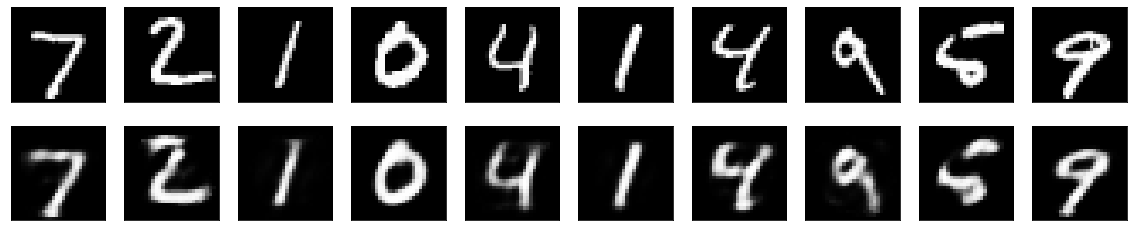



Optimizer: rmsprop
Epoch 1/5
352/352 [==============================] - 4s 8ms/step - loss: 0.1030 - accuracy: 0.0100 - val_loss: 0.1022 - val_accuracy: 0.0106
Epoch 2/5
352/352 [==============================] - 4s 10ms/step - loss: 0.0999 - accuracy: 0.0104 - val_loss: 0.1004 - val_accuracy: 0.0110
Epoch 3/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0980 - accuracy: 0.0112 - val_loss: 0.1013 - val_accuracy: 0.0109
Epoch 4/5
352/352 [==============================] - 2s 7ms/step - loss: 0.0969 - accuracy: 0.0110 - val_loss: 0.0986 - val_accuracy: 0.0115
Epoch 5/5
313/313 [==============================] - 1s 5ms/step - loss: 0.0949 - accuracy: 0.0142
Accuracy: 0.0142000000923872


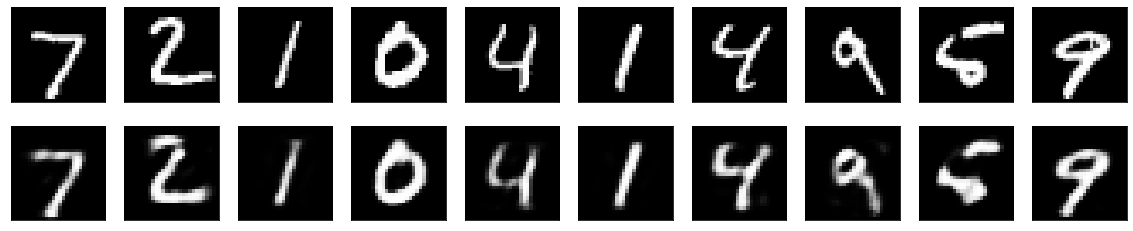



Optimizer: SGD
Epoch 1/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0953 - accuracy: 0.0122 - val_loss: 0.0965 - val_accuracy: 0.0115
Epoch 2/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0949 - accuracy: 0.0120 - val_loss: 0.0964 - val_accuracy: 0.0111
Epoch 3/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0948 - accuracy: 0.0119 - val_loss: 0.0963 - val_accuracy: 0.0112
Epoch 4/5
352/352 [==============================] - 3s 9ms/step - loss: 0.0948 - accuracy: 0.0118 - val_loss: 0.0963 - val_accuracy: 0.0110
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0938 - accuracy: 0.0131
Accuracy: 0.013100000098347664


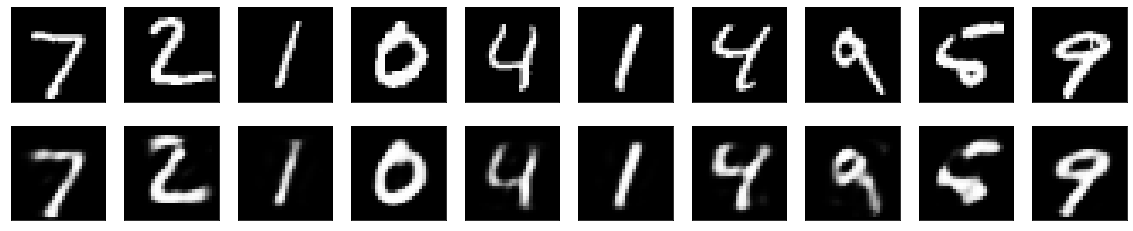



Optimizer: adadelta
Epoch 1/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0948 - accuracy: 0.0117 - val_loss: 0.0963 - val_accuracy: 0.0110
Epoch 2/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0948 - accuracy: 0.0117 - val_loss: 0.0963 - val_accuracy: 0.0110
Epoch 3/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0948 - accuracy: 0.0117 - val_loss: 0.0963 - val_accuracy: 0.0110
Epoch 4/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0948 - accuracy: 0.0117 - val_loss: 0.0963 - val_accuracy: 0.0110
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0938 - accuracy: 0.0130
Accuracy: 0.013000000268220901


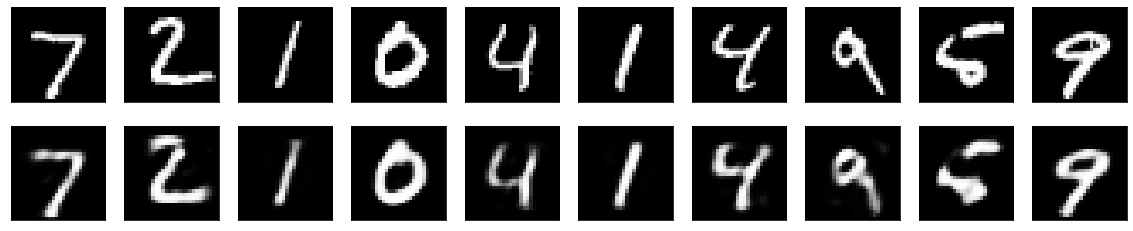



Best Suited Optimizer: rmsprop


In [ ]:
optimizers = ['adam', 'rmsprop','SGD','adadelta']
best = ""
best_acc = 0.0
for o in optimizers:
  print("Optimizer:",o)
  model.compile(optimizer=o, loss="binary_crossentropy", metrics = ['accuracy'])
  model.fit(X_train, X_train, batch_size=128, epochs=5, validation_split=0.25)
  acc = model.evaluate(X_test,X_test)[1]
  print("Accuracy:", acc)
  decoded_images = model.predict(X_test)
  plot_and_compare(X_test, decoded_images)
  if acc>best_acc:
    best_acc = acc
    best = o
  print("\n")

print("Best Suited Optimizer:", best)

In [ ]:
model.compile(optimizer=best, loss="binary_crossentropy", metrics = ['accuracy'])
model.fit(X_train, X_train, batch_size=128, epochs=5, validation_split=0.25)

Epoch 1/5
352/352 [==============================] - 3s 7ms/step - loss: 0.0956 - accuracy: 0.0115 - val_loss: 0.0966 - val_accuracy: 0.0113
Epoch 2/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0952 - accuracy: 0.0115 - val_loss: 0.0969 - val_accuracy: 0.0112
Epoch 3/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0949 - accuracy: 0.0114 - val_loss: 0.0960 - val_accuracy: 0.0104
Epoch 4/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0947 - accuracy: 0.0120 - val_loss: 0.0961 - val_accuracy: 0.0123
Epoch 5/5
352/352 [==============================] - 2s 7ms/step - loss: 0.0945 - accuracy: 0.0115 - val_loss: 0.0963 - val_accuracy: 0.0130


In [ ]:
decoded_images = model.predict(X_test)
decoded_images.shape

(10000, 784)

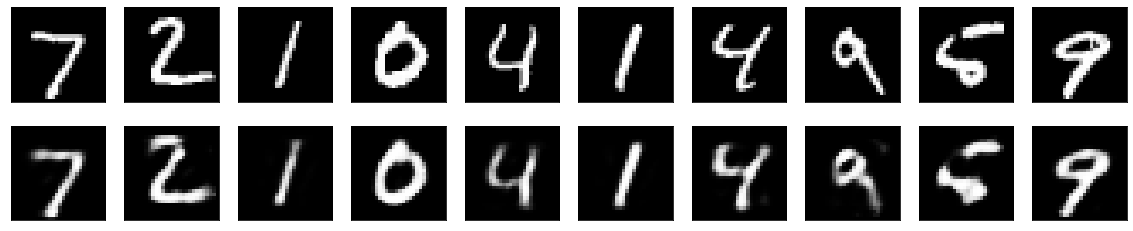

In [ ]:
plot_and_compare(X_test, decoded_images)

In [ ]:
# deepmodel
input = Input(shape=(784,))
e1 = Dense(392, activation = "relu")(input)
e2 = Dense(196, activation = "relu")(e1)
c = Dense(128, activation = "relu")(e2)
d1 = Dense(196, activation = "relu")(c)
d2 = Dense(392, activation = "relu")(d1)
output = Dense(784, activation="sigmoid")(d2)

deepmodel = Model(inputs = input, outputs = output)
deepmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 392)               307720    
                                                                 
 dense_3 (Dense)             (None, 196)               77028     
                                                                 
 dense_4 (Dense)             (None, 128)               25216     
                                                                 
 dense_5 (Dense)             (None, 196)               25284     
                                                                 
 dense_6 (Dense)             (None, 392)               77224     
                                                                 
 dense_7 (Dense)             (None, 784)               3081

Optimizer: adam
Epoch 1/5
352/352 [==============================] - 4s 8ms/step - loss: 0.1746 - accuracy: 0.0114 - val_loss: 0.1141 - val_accuracy: 0.0107
Epoch 2/5
352/352 [==============================] - 3s 8ms/step - loss: 0.1035 - accuracy: 0.0130 - val_loss: 0.0985 - val_accuracy: 0.0115
Epoch 3/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0934 - accuracy: 0.0137 - val_loss: 0.0913 - val_accuracy: 0.0113
Epoch 4/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0880 - accuracy: 0.0137 - val_loss: 0.0874 - val_accuracy: 0.0152
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0827 - accuracy: 0.0141
Accuracy: 0.014100000262260437


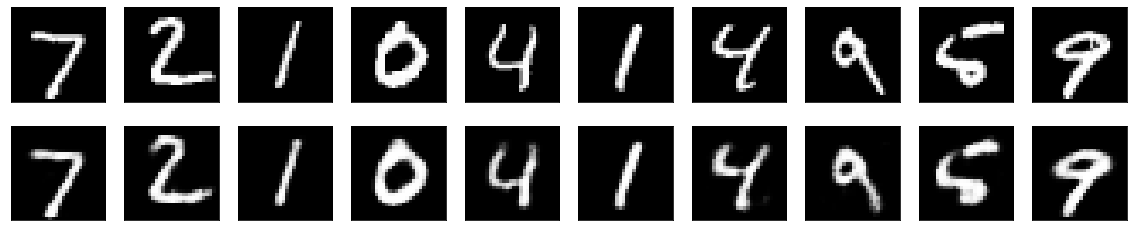



Optimizer: rmsprop
Epoch 1/5
352/352 [==============================] - 5s 12ms/step - loss: 0.1217 - accuracy: 0.0134 - val_loss: 0.1161 - val_accuracy: 0.0093
Epoch 2/5
352/352 [==============================] - 5s 13ms/step - loss: 0.1065 - accuracy: 0.0138 - val_loss: 0.1030 - val_accuracy: 0.0131
Epoch 3/5
352/352 [==============================] - 5s 13ms/step - loss: 0.1019 - accuracy: 0.0146 - val_loss: 0.0976 - val_accuracy: 0.0199
Epoch 4/5
352/352 [==============================] - 5s 14ms/step - loss: 0.0988 - accuracy: 0.0138 - val_loss: 0.0944 - val_accuracy: 0.0119
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0986 - accuracy: 0.0113
Accuracy: 0.011300000362098217


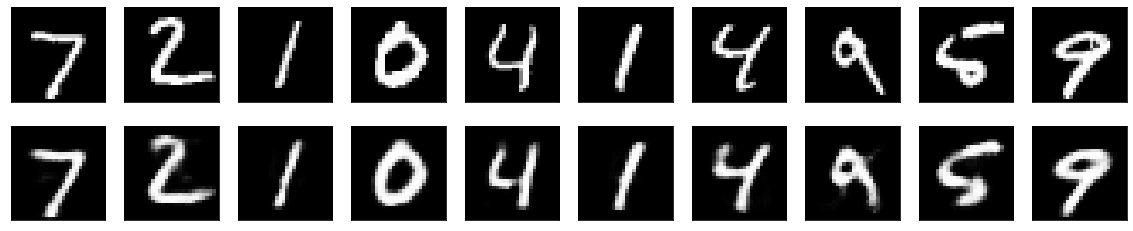



Optimizer: SGD
Epoch 1/5
352/352 [==============================] - 5s 12ms/step - loss: 0.0892 - accuracy: 0.0117 - val_loss: 0.0884 - val_accuracy: 0.0127
Epoch 2/5
352/352 [==============================] - 3s 10ms/step - loss: 0.0854 - accuracy: 0.0135 - val_loss: 0.0875 - val_accuracy: 0.0131
Epoch 3/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0848 - accuracy: 0.0136 - val_loss: 0.0870 - val_accuracy: 0.0133
Epoch 4/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0844 - accuracy: 0.0140 - val_loss: 0.0867 - val_accuracy: 0.0137
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.0134
Accuracy: 0.013399999588727951


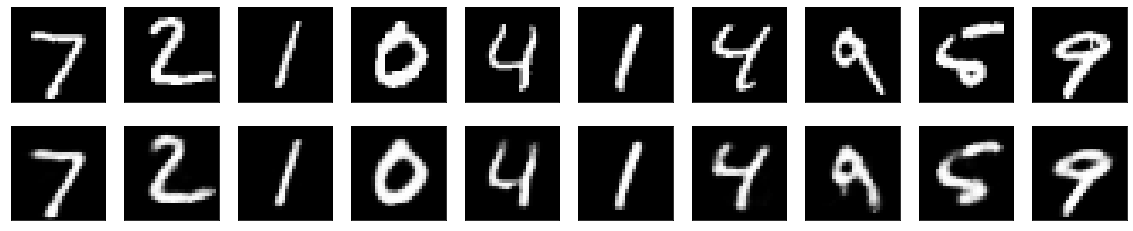



Optimizer: adadelta
Epoch 1/5
352/352 [==============================] - 4s 9ms/step - loss: 0.0840 - accuracy: 0.0142 - val_loss: 0.0865 - val_accuracy: 0.0141
Epoch 2/5
352/352 [==============================] - 3s 9ms/step - loss: 0.0839 - accuracy: 0.0142 - val_loss: 0.0864 - val_accuracy: 0.0141
Epoch 3/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0839 - accuracy: 0.0143 - val_loss: 0.0864 - val_accuracy: 0.0140
Epoch 4/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0839 - accuracy: 0.0143 - val_loss: 0.0864 - val_accuracy: 0.0139
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0846 - accuracy: 0.0134
Accuracy: 0.013399999588727951


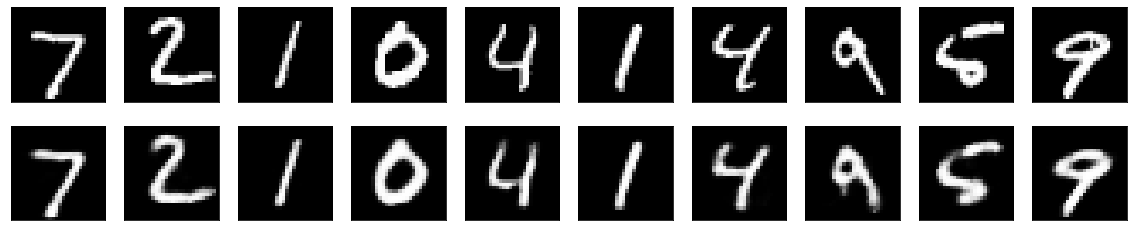



Optimizer: adagrad
Epoch 1/5
352/352 [==============================] - 4s 10ms/step - loss: 0.0838 - accuracy: 0.0143 - val_loss: 0.0863 - val_accuracy: 0.0138
Epoch 2/5
352/352 [==============================] - 3s 9ms/step - loss: 0.0838 - accuracy: 0.0144 - val_loss: 0.0863 - val_accuracy: 0.0139
Epoch 3/5
352/352 [==============================] - 4s 11ms/step - loss: 0.0837 - accuracy: 0.0145 - val_loss: 0.0862 - val_accuracy: 0.0139
Epoch 4/5
352/352 [==============================] - 3s 9ms/step - loss: 0.0837 - accuracy: 0.0146 - val_loss: 0.0862 - val_accuracy: 0.0139
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0844 - accuracy: 0.0134
Accuracy: 0.013399999588727951


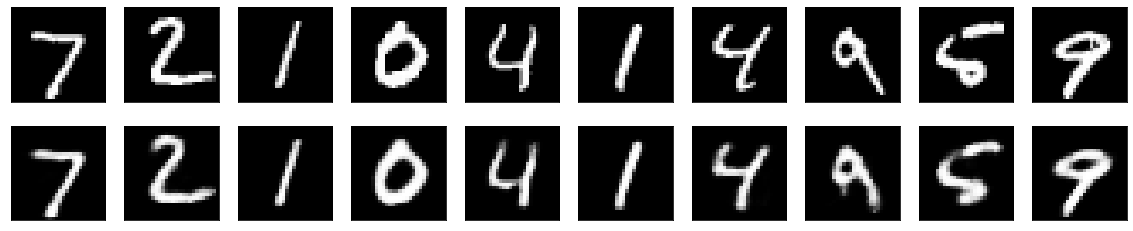



Best Suited Optimizer: adam


In [ ]:
optimizers = ['adam', 'rmsprop','SGD','adadelta', 'adagrad']
best = ""
best_acc = 0.0
for o in optimizers:
  print("Optimizer:",o)
  deepmodel.compile(optimizer=o, loss="binary_crossentropy", metrics = ['accuracy'])
  deepmodel.fit(X_train, X_train, batch_size=128, epochs=5, validation_split=0.25)
  acc = deepmodel.evaluate(X_test,X_test)[1]
  print("Accuracy:", acc)
  decoded_images = deepmodel.predict(X_test)
  plot_and_compare(X_test, decoded_images)
  if acc>best_acc:
    best_acc = acc
    best = o
  print("\n")

print("Best Suited Optimizer:", best)

In [ ]:
model.compile(optimizer=best, loss="binary_crossentropy", metrics = ['accuracy'])
model.fit(X_train, X_train, batch_size=128, epochs=5, validation_split=0.25)

Epoch 1/5
352/352 [==============================] - 3s 6ms/step - loss: 0.0937 - accuracy: 0.0117 - val_loss: 0.0950 - val_accuracy: 0.0115
Epoch 2/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0935 - accuracy: 0.0115 - val_loss: 0.0948 - val_accuracy: 0.0125
Epoch 3/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0933 - accuracy: 0.0118 - val_loss: 0.0947 - val_accuracy: 0.0127
Epoch 4/5
352/352 [==============================] - 2s 6ms/step - loss: 0.0932 - accuracy: 0.0118 - val_loss: 0.0946 - val_accuracy: 0.0124
Epoch 5/5
352/352 [==============================] - 3s 8ms/step - loss: 0.0931 - accuracy: 0.0119 - val_loss: 0.0945 - val_accuracy: 0.0128


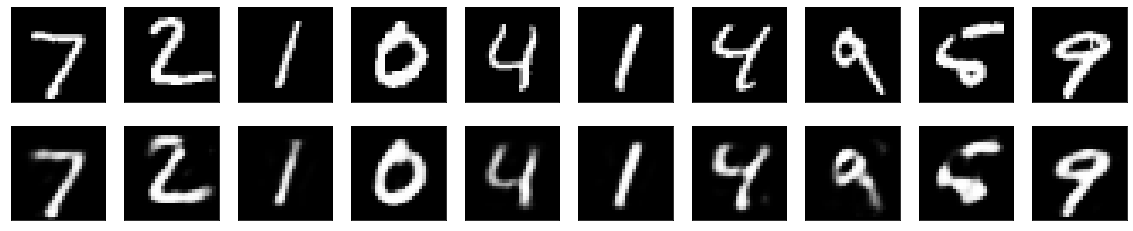

In [ ]:
decoded_images = model.predict(X_test)
plot_and_compare(X_test, decoded_images)

In [ ]:
# non symmetric
input = Input(shape=(784,))
e1 = Dense(392, activation = "relu")(input)
e2 = Dense(196, activation = "relu")(e1)
e3 = Dense(128, activation = "relu")(e2)
c = Dense(64, activation="relu")(e3)
d1 = Dense(100, activation = "relu")(c)
d2 = Dense(200, activation = "relu")(d1)
d3 = Dense(400, activation = "relu")(d2)
output = Dense(784, activation="sigmoid")(d2)

non_symmetric = Model(inputs = input, outputs = output)
non_symmetric.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_64 (Dense)            (None, 392)               307720    
                                                                 
 dense_65 (Dense)            (None, 196)               77028     
                                                                 
 dense_66 (Dense)            (None, 128)               25216     
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 100)               6500      
                                                                 
 dense_69 (Dense)            (None, 200)               202

In [ ]:
non_symmetric.compile(optimizer="adadelta", loss="binary_crossentropy", metrics = ['accuracy'])
non_symmetric.fit(X_train, X_train, batch_size=128, epochs=5, validation_split=0.25)

Epoch 1/5
352/352 [==============================] - 4s 9ms/step - loss: 0.6929 - accuracy: 0.0012 - val_loss: 0.6929 - val_accuracy: 9.3333e-04
Epoch 2/5
352/352 [==============================] - 3s 9ms/step - loss: 0.6928 - accuracy: 0.0013 - val_loss: 0.6927 - val_accuracy: 9.3333e-04
Epoch 3/5
352/352 [==============================] - 3s 9ms/step - loss: 0.6927 - accuracy: 0.0013 - val_loss: 0.6926 - val_accuracy: 8.0000e-04
Epoch 4/5
352/352 [==============================] - 3s 8ms/step - loss: 0.6926 - accuracy: 0.0013 - val_loss: 0.6925 - val_accuracy: 8.0000e-04
Epoch 5/5
352/352 [==============================] - 3s 9ms/step - loss: 0.6924 - accuracy: 0.0013 - val_loss: 0.6924 - val_accuracy: 8.0000e-04


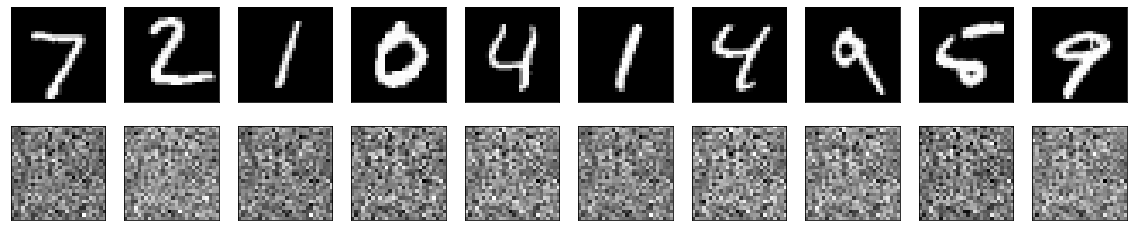

In [ ]:
decoded_images = non_symmetric.predict(X_test)
plot_and_compare(X_test, decoded_images)

In [ ]:
# Noising and DeNoising Images

In [ ]:
corruption_level = 0.9
X_train_noisy = X_train+corruption_level*np.random.normal(loc = 0.0, 
                                                          scale = 1.0, 
                                                          size = X_train.shape)

X_test_noisy = X_test+corruption_level*np.random.normal(loc = 0.0, 
                                                          scale = 1.0, 
                                                          size = X_test.shape)

In [ ]:
X_train_noisy = np.clip(X_train_noisy, 0. , 1.)
X_test_noisy = np.clip(X_test_noisy, 0. , 1.)

In [ ]:
# deepmodel
input = Input(shape=(784,))
e1 = Dense(392, activation = "relu")(input)
e2 = Dense(196, activation = "relu")(e1)
c = Dense(128, activation = "relu")(e2)
d1 = Dense(196, activation = "relu")(c)
d2 = Dense(392, activation = "relu")(d1)
output = Dense(784, activation="sigmoid")(d2)

deepmodel = Model(inputs = input, outputs = output)
deepmodel.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_58 (Dense)            (None, 392)               307720    
                                                                 
 dense_59 (Dense)            (None, 196)               77028     
                                                                 
 dense_60 (Dense)            (None, 128)               25216     
                                                                 
 dense_61 (Dense)            (None, 196)               25284     
                                                                 
 dense_62 (Dense)            (None, 392)               77224     
                                                                 
 dense_63 (Dense)            (None, 784)               308

In [ ]:
deepmodel.compile(optimizer="adam", loss="binary_crossentropy", metrics = ['accuracy'])
deepmodel.fit(X_train_noisy, X_train, batch_size=128, epochs=5, validation_split=0.25)

Epoch 1/5
352/352 [==============================] - 4s 9ms/step - loss: 0.2441 - accuracy: 0.0112 - val_loss: 0.1996 - val_accuracy: 0.0144
Epoch 2/5
352/352 [==============================] - 3s 8ms/step - loss: 0.1865 - accuracy: 0.0117 - val_loss: 0.1814 - val_accuracy: 0.0154
Epoch 3/5
352/352 [==============================] - 3s 7ms/step - loss: 0.1727 - accuracy: 0.0120 - val_loss: 0.1715 - val_accuracy: 0.0097
Epoch 4/5
352/352 [==============================] - 3s 8ms/step - loss: 0.1648 - accuracy: 0.0116 - val_loss: 0.1674 - val_accuracy: 0.0161
Epoch 5/5
352/352 [==============================] - 3s 8ms/step - loss: 0.1590 - accuracy: 0.0116 - val_loss: 0.1638 - val_accuracy: 0.0126


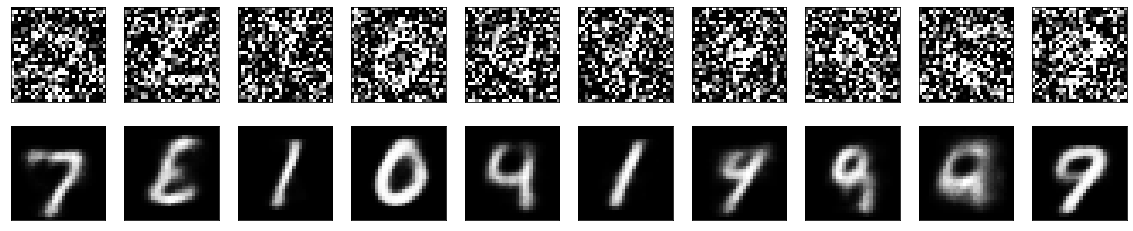

In [ ]:
denoised_images = deepmodel.predict(X_test_noisy)
plot_and_compare(X_test_noisy,denoised_images)

In [ ]:
# Sparse Autoencoder

In [ ]:
# deepmodel
from keras.regularizers import 

input = Input(shape=(784,))
e1 = Dense(392, activation = "relu", )(input)
e2 = Dense(196, activation = "relu")(e1)
c = Dense(128, activation = "relu", regularizer = )(e2)
d1 = Dense(196, activation = "relu")(c)
d2 = Dense(392, activation = "relu")(d1)
output = Dense(784, activation="sigmoid")(d2)

deepmodel = Model(inputs = input, outputs = output)
deepmodel.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_72 (Dense)            (None, 392)               307720    
                                                                 
 dense_73 (Dense)            (None, 196)               77028     
                                                                 
 dense_74 (Dense)            (None, 128)               25216     
                                                                 
 dense_75 (Dense)            (None, 196)               25284     
                                                                 
 dense_76 (Dense)            (None, 392)               77224     
                                                                 
 dense_77 (Dense)            (None, 784)               308